In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
###Change root variable###
root = r'C:\Users\Oguz\Desktop\Bilkent\3.2\CS464\hw1'
os.chdir(root)

##   <font color='red'>Q2.1</font>

In [3]:
def counter(array):
    spam_count=len(np.argwhere(array == 1))
    total_count=len(array)
    ham_count=total_count-spam_count
    return spam_count, ham_count

##   <font color='red'>Q2.2</font>

In [4]:
def prediction2_2(x_array, y_array,test_x):
    T_j_spam=  x_array[np.argwhere(y_array == 1).T[0]]
    T_j_normal=  x_array[np.argwhere(y_array == 0).T[0]]
    N_normal , N_spam= counter(y_array)
    N = len(y_array)
    Pi_normal= N_normal/N
    Pi_spam=N_spam/N
    small=1e-12
    theta_j_spam=  T_j_spam.sum(axis=0) /(T_j_spam.sum())
    theta_j_normal=  T_j_normal.sum(axis=0) /(T_j_normal.sum())
    prob_spam= np.log(Pi_spam) + \
        (test_x * np.log(theta_j_spam+small)).sum(axis=1)
    prob_normal=np.log(Pi_normal) + \
        (test_x * np.log(theta_j_normal+small)).sum(axis=1)
    return (prob_spam>prob_normal)*1

##   <font color='red'>Q2.3</font>

In [5]:
def prediction2_3(x_array, y_array,test_x,alpha):
    T_j_spam=  x_array[np.argwhere(y_array == 1).T[0]]
    T_j_normal=  x_array[np.argwhere(y_array == 0).T[0]]
    N_normal , N_spam= counter(y_array)
    N = len(y_array)
    Pi_normal= N_normal/N
    Pi_spam=N_spam/N
    theta_j_spam=  (T_j_spam.sum(axis=0)+ alpha) / \
    (T_j_spam.sum() +alpha *len(x_array.T))
    theta_j_normal=  (T_j_normal.sum(axis=0) + alpha) / \
    (T_j_normal.sum() + alpha *len(x_array.T) )
    prob_spam= np.log(Pi_spam) + (test_x * np.log(theta_j_spam)).sum(axis=1)
    prob_normal=np.log(Pi_normal) + (test_x * np.log(theta_j_normal)).sum(axis=1)
    return (prob_spam>prob_normal)*1

##   <font color='red'>Q2.3</font>

In [6]:
def bernoulli_prediction(train_x, train_y,test_x):
    normal_matrix=((train_x!=0)*1)[np.argwhere(train_y == 0).T[0]]
    spam_matrix=((train_x!=0)*1)[np.argwhere(train_y == 1).T[0]]
    S_j_spam=spam_matrix.sum(axis=0)
    S_j_normal=normal_matrix.sum(axis=0)
    N_normal , N_spam= counter(train_y)
    N = len(train_y)
    Pi_normal= N_normal/N
    Pi_spam=N_spam/N
    theta_j_spam_=  S_j_spam   / len(spam_matrix)  
    theta_j_normal_=  S_j_normal/ len(normal_matrix)  
    test_matrix=(test_x != 0)*1
    small=1e-12
    prob_spam= np.log(Pi_spam) + np.log( test_matrix * theta_j_spam_ \
                    + (1-test_matrix)* (1- theta_j_spam_)+small).sum(axis=1)
    prob_normal= np.log(Pi_normal) + np.log( test_matrix * theta_j_normal_ \
                    + (1-test_matrix)* (1- theta_j_normal_)  +small).sum(axis=1)
    
    return 1*(prob_spam>prob_normal)

In [7]:
def confusion(test_y,result,ax,title="Result"):
    correct=len(np.argwhere(test_y==result))
    accuracy= 100*correct/len(test_y)
    confusion = pd.crosstab(test_y, result)
    ax.matshow(confusion,cmap='OrRd')
    ax.set(xlabel='Test', ylabel='Prediction')
    for i in range(2):
        for j in range(2):
            c = confusion[j][i]
            ax.text(i, j, str(c), va='center', ha='center')
    ax.set_title(title)
    print("Accuracy for {} is: {:.3f} %".format(title,accuracy))

In [8]:
def result(a):
    train_x=pd.read_csv("x_train.csv").to_numpy()
    train_y=pd.read_csv("y_train.csv").to_numpy()
    test_x=pd.read_csv("x_test.csv").to_numpy()
    test_y=pd.read_csv("y_test.csv").to_numpy().T[0]
    fig, ax = plt.subplots()
    if a==1:
        result=prediction2_2(train_x,train_y,test_x)
    elif a==2:
        result=prediction2_3(train_x,train_y,test_x,5)
    elif a==3:
        result=prediction2_3(train_x,train_y,test_x,1e-10)
    else:
        result=bernoulli_prediction(train_x, train_y,test_x)
    confusion(test_y,result,ax)
    plt.show()

In [11]:
def main():
    train_x=pd.read_csv("x_train.csv").to_numpy()
    train_y=pd.read_csv("y_train.csv").to_numpy()
    test_x=pd.read_csv("x_test.csv").to_numpy()
    test_y=pd.read_csv("y_test.csv").to_numpy().T[0]
    spam_count,ham_count= counter(train_y)
    spam_percentage= 100 * spam_count/(spam_count+ham_count)
    print("The percentage of spam e-mails in \
the y_train.csv is: {:.3f} %".format(spam_percentage))
    data=np.c_[train_x,train_y]
    np.random.shuffle(data)
    train_x=data[:,:-1]
    train_y=data[:,-1]
    r1=prediction2_2(train_x,train_y,test_x)
    r2=prediction2_3(train_x,train_y,test_x,5)
    r3=prediction2_3(train_x,train_y,test_x,1e-10)
    r4=bernoulli_prediction(train_x, train_y,test_x)
    plt.rcParams["figure.figsize"] = [12,8]
    plt.rcParams["figure.autolayout"] = True
    fig, ax = plt.subplots(2,2)
    plt.title("Confusion Matrices")
    confusion(test_y,r1,ax[0,0],"Multinomial Naive Bayes Model")
    confusion(test_y,r2,ax[0,1],"Multinomial Naive Bayes Model \
with Drichlet Prior 5")
    confusion(test_y,r3,ax[1,0],"Multinomial Naive Bayes Model \
with Drichlet Prior 10^(-10)")
    confusion(test_y,r4,ax[1,1],"Bernoulli Naive Bayes Model")
    plt.show()

The percentage of spam e-mails in the y_train.csv is: 28.596 %
Accuracy for Multinomial Naive Bayes Model is: 96.135 %
Accuracy for Multinomial Naive Bayes Model with Drichlet Prior 5 is: 94.976 %
Accuracy for Multinomial Naive Bayes Model with Drichlet Prior 10^(-10) is: 96.232 %
Accuracy for Bernoulli Naive Bayes Model is: 91.884 %


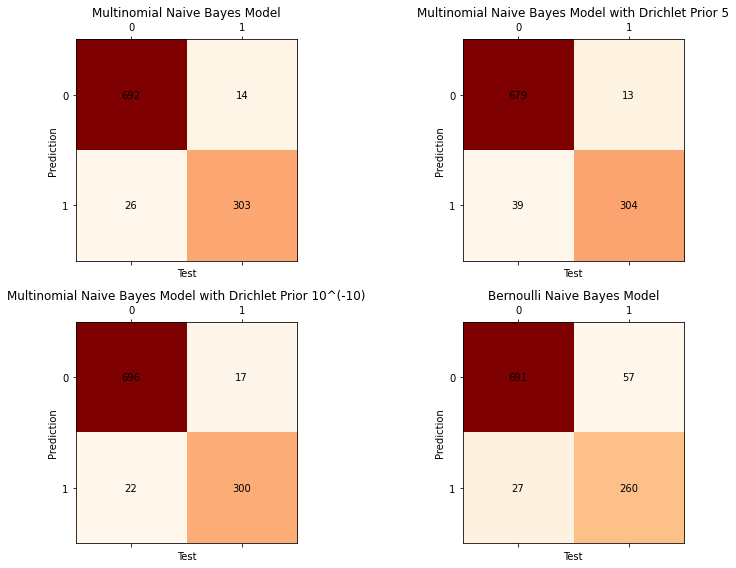

In [12]:
if __name__ == '__main__':
    main()